# MCMC simulation of Dugongs Age-Length

## Imports

In [1]:
%matplotlib inline
from pymc3 import *
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
# Age
x = np.array([1.0, 1.5, 1.5, 1.5, 2.5, 4.0, 5.0, 5.0, 7.0, 8.0, 
             8.5, 9.0, 9.5, 9.5, 10.0, 12.0, 12.0, 13.0, 13.0, 
             14.5, 15.5, 15.5, 16.5, 17.0, 22.5, 29.0, 31.5])

# Target: Lengths
y = np.array([1.80, 1.85, 1.87, 1.77, 2.02, 2.27, 2.15, 2.26, 2.47, 
             2.19, 2.26, 2.40, 2.39, 2.41, 2.50, 2.32, 2.32, 2.43, 
             2.47, 2.56, 2.65, 2.47, 2.64, 2.56, 2.70, 2.72, 2.57])

## Specify model

$$Y_i = \alpha - \beta \gamma^{X_i} + \epsilon_i$$ $$\epsilon_i \sim N(0,\sigma^2)$$

In [3]:
with Model() as model: # model specifications
    # Define priors
    alpha = Normal('alpha', 0, sd=1e3)
    beta = Normal('beta', 0, sd=1e3)
    gamma = Uniform('gamma', 0.5, 1)
    sigma = HalfNormal('sigma', 10)
    
    # Define likelihood
    likelihood = Normal('y', mu=alpha - beta * gamma**x,
                        sd=sigma, observed=y)

    start = find_MAP() # Find starting value by optimization
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(4000, step, start=start, progressbar=True, njobs=3) 
    # draw 4000 posterior samples, 3 chains.

Optimization terminated successfully.
         Current function value: -4.533524
         Iterations: 20
         Function evaluations: 39
         Gradient evaluations: 39


100%|██████████| 4000/4000 [00:25<00:00, 155.62it/s]


## Inference

In [4]:
trace_burnin = trace[500:] # Apply burn in, 500 samples.
df_summary(trace_burnin, varnames=['alpha', 'beta', 'gamma','sigma']) # Summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,2.652511,0.072294,0.001811,2.511954,2.791170
beta,0.974722,0.078719,0.001325,0.819370,1.129446
gamma,0.862057,0.032799,0.000775,0.791432,0.917148
sigma,0.101138,0.015691,0.000197,0.071952,0.131654


Look converged, Highest posterior density interval narrow and monte carlo error relativly low.

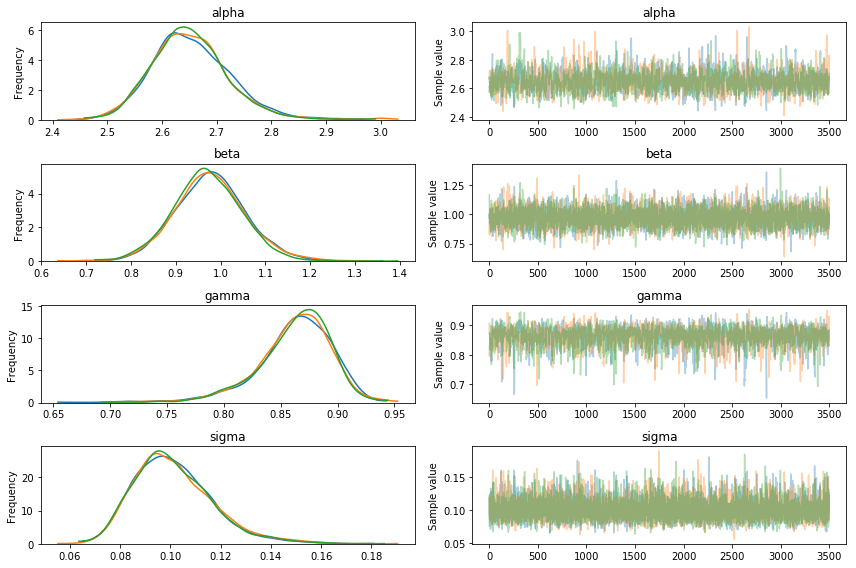

In [5]:
plt.figure(figsize=(4, 4))
traceplot(trace_burnin)
plt.tight_layout()

## Non-linear relationship between age and length?

If there was no non-linear change with age, then $\gamma$ would be 1. Clearly from the marginal posterior for $\gamma$, there is no probability density close to 1. Hence there is very strong evidence that there is a non-linear relationship.